In [1]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.3 MB/s eta 0:00:00


In [39]:
# @title Importing Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import plotly.subplots as sp
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
# @title Data Importing
df=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# @title Data Attribute Information

**Attribute Information** \
1) **id:** unique identifier\
2) **gender:** "Male", "Female" or "Other"\
3) **age:** age of the patient \
4) **hypertension:** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension\
5) **heart_disease:** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease\
6) ever_married: "No" or "Yes"\
7) **work_type:** "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"\
8) **Residence_type:** "Rural" or "Urban"\
9) **avg_glucose_level:** average glucose level in blood\
10) **bmi:** body mass index\
11) **smoking_status:** "formerly smoked", "never smoked", "smokes" or "Unknown"*\
12) stroke: 1 if the patient had a stroke or 0 if not\
*Note:** "Unknown" in smoking_status means that the information is unavailable for this patient


In [6]:
# @title EDA

In [7]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [8]:
df.isna().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [9]:
df['bmi'].max()

97.6

In [10]:
df['bmi'].min()

10.3

In [11]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [12]:

df['gender'].value_counts()

,count
gender,
Female,2994
Male,2115
Other,1


In [13]:
df['gender'].replace("Other",df['gender'].mode()[0],inplace=True)

In [14]:

df['smoking_status'].value_counts()

,count
smoking_status,
never smoked,1892
Unknown,1544
formerly smoked,885
smokes,789


In [15]:
# Filter data for stroke & Non Stroke
no_stroke_data = df[df['stroke'] == 0 ]
stroke_data = df[df['stroke'] == 1 ]

In [16]:
stroke_count =df['stroke'].value_counts()

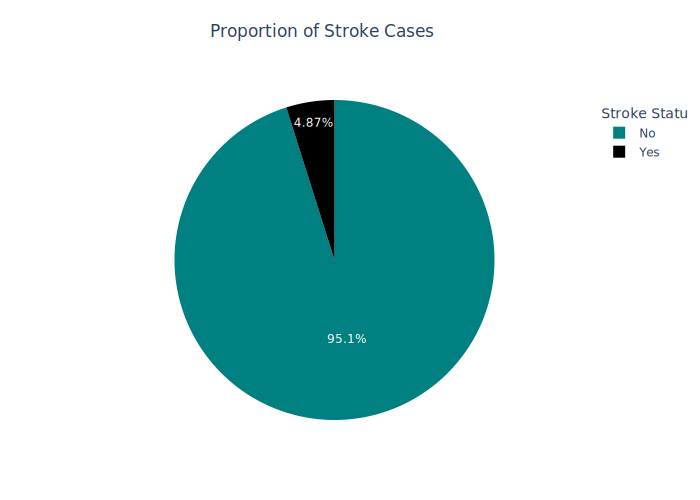

In [17]:
plot_color = ['#008080', 'black']
sns.set_palette(['#008080', 'black'])
fig = px.pie(
    stroke_count, values=stroke_count.values, names=['No', 'Yes'],
    title = 'Proportion of Stroke Cases',
    color_discrete_sequence=plot_color)

fig.update_layout(legend_title_text = 'Stroke Status', title_x=0.3, title_y = 0.95)
fig.show('svg')

In [18]:

def custom_historgram(columns:str, titles:list)->go.Figure:
    fig = sp.make_subplots(rows=1, cols=2, subplot_titles = ['No Stroke', 'Yes Stroke'])
    histogram_no_stroke = px.histogram(no_stroke_data, x = columns, color_discrete_sequence=['#008080'])
    histogram_stroke = px.histogram(stroke_data, x = columns, color_discrete_sequence=['black'])
    fig.add_trace(histogram_no_stroke['data'][0], row=1, col=1)
    fig.add_trace(histogram_stroke['data'][0], row=1, col=2)
    fig.update_layout(title = titles[0], title_x = 0.5)
    fig.update_xaxes(title_text = titles[1])
    fig.update_yaxes(title_text = 'Count')
    return fig

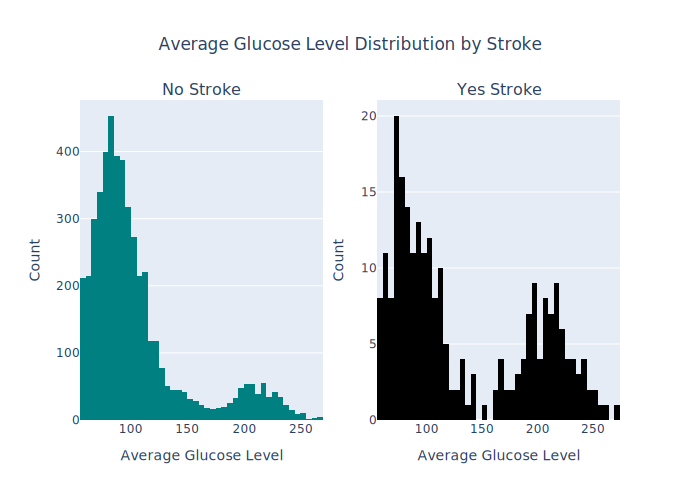

In [19]:
fig = custom_historgram('avg_glucose_level', ['Average Glucose Level Distribution by Stroke', 'Average Glucose Level'])
fig.show('svg')

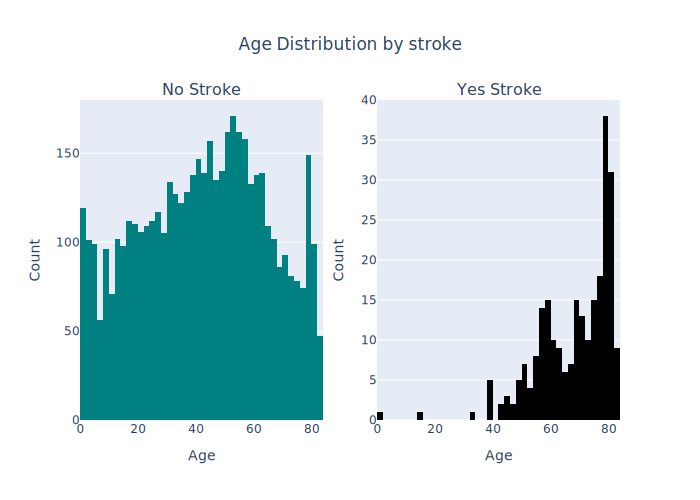

In [20]:
fig = custom_historgram('age', ['Age Distribution by stroke', 'Age'])
fig.show('svg')

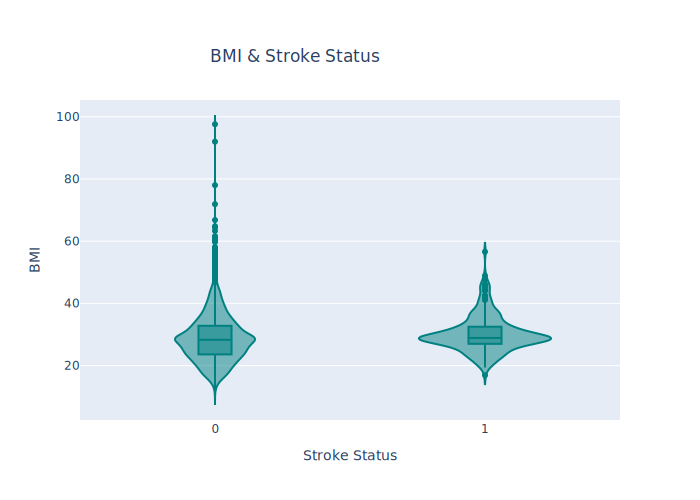

In [21]:
fig = px.violin(df, y = 'bmi', x='stroke', box=True, width=700, height=500, color_discrete_sequence=plot_color,
                   title='BMI & Stroke Status',
               labels={'stroke': 'Stroke Status', 'bmi': 'BMI'})
fig.update_layout(title_x = 0.3, title_y = 0.9)
fig.show('svg')

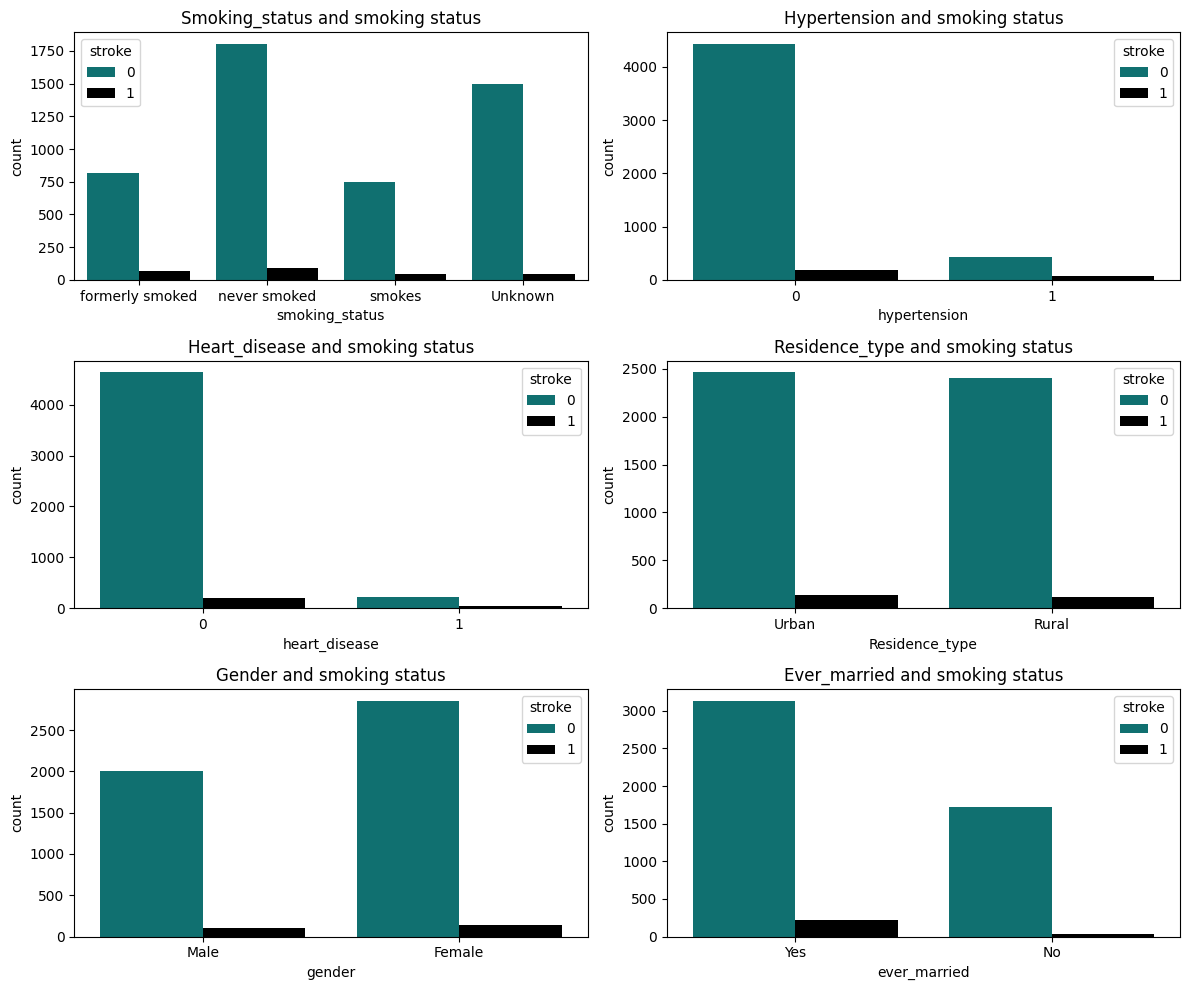

In [22]:
x_values = ['smoking_status', 'hypertension', 'heart_disease','Residence_type','gender', 'ever_married']
fig, axis = plt.subplots(nrows = 3, ncols = 2, figsize=(12, 10))

for ax, x_value in zip(axis.flat, x_values):
    sns.countplot(data = df, x = x_value, hue='stroke', ax = ax)
    ax.set_title(f'{x_value.capitalize()} and smoking status')

plt.tight_layout()
plt.show()

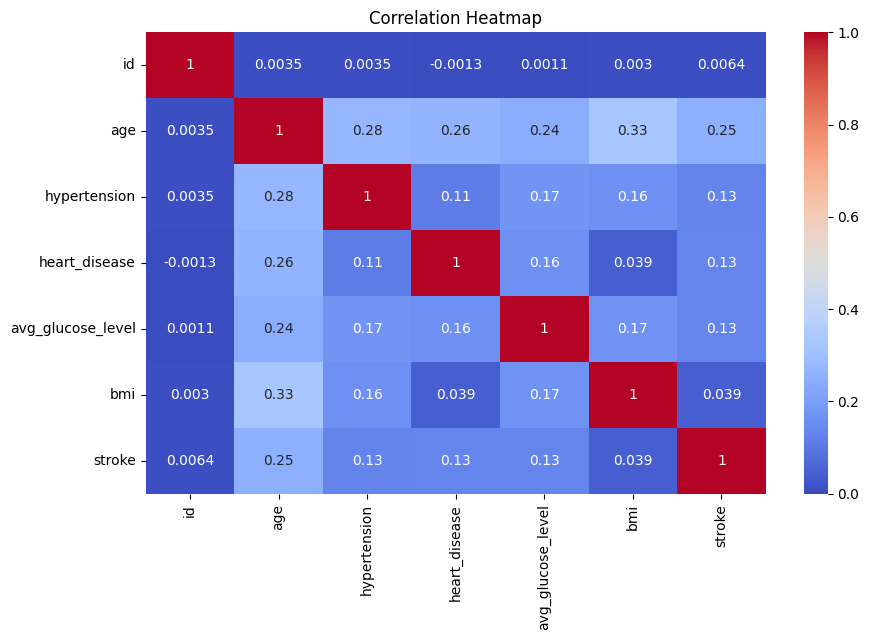

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [24]:
# @title Data Preparation and Preprocessing

In [32]:
input_cols = list(df.columns)[1:-1]

In [33]:
target = 'stroke'

In [34]:
train_input = df[input_cols]
train_target = df[target]

In [35]:
numerical_cols = train_input.select_dtypes(include=np.number).columns.to_list()

In [36]:
categorical_cols = train_input.select_dtypes(include='object').columns.to_list()

In [37]:
categorical_cols.remove('smoking_status')

In [46]:
# Preprocessing pipelines
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])



In [52]:
preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_cols),
    ('cat', cat_pipeline, categorical_cols),
    ('ordinal',OrdinalEncoder(categories=[['Unknown','never smoked', 'formerly smoked','smokes']]),['smoking_status'])
])

In [102]:
x=preprocessor.fit_transform(train_input)

In [ ]:
# @title class Imbalanced issue

In [103]:
sm = SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x, train_target)

In [105]:
x.shape

(5110, 17)

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x_train_res, y_train_res, test_size=0.2, random_state=42)

In [107]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7777, 17), (1945, 17), (7777,), (1945,))

In [61]:
# @title Base Models

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    print(f"----- {name} -----")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

----- Logistic Regression -----
[[960   0]
 [ 62   0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

----- Random Forest -----
[[959   1]
 [ 62   0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

----- XGBoost -----
[[952   8]
 [ 55   7]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       960
           1       0.47      0.11      0.18        62

    accuracy                       

[[926  49]
 [ 36 934]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       975
           1       0.95      0.96      0.96       970

    accuracy                           0.96      1945
   macro avg       0.96      0.96      0.96      1945
weighted avg       0.96      0.96      0.96      1945



In [111]:
final_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight="balanced"))
])

In [112]:
import joblib
final_pipeline.fit(train_input, train_target)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Unknown',
                                                                              'never '
                                                                              'smoked',
                                                                              'formerly '
                                                                              'smoked',
                                                                              'smokes']]),
                                                  ['smoking_status'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced'))])

In [118]:
joblib.dump(final_pipeline, 'final_pipeline.pkl')

['final_pipeline.pkl']

In [ ]:
sm = SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)